<a href="https://colab.research.google.com/github/imancn/nlp/blob/main/News_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##import library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
nltk.download('punkt')
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics.pairwise import cosine_similarity

from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


##extract from .txt file to .csv

In [3]:
file = "/content/drive/MyDrive/Colab Notebooks/NLP/news-classification/content/Hamshahri-Corpus.txt"
f = open("/content/drive/MyDrive/Colab Notebooks/NLP/news-classification/content/Hamshahri-Corpus.csv", "w")
f.write("id,date,cat,text\n")
with open(file,"r") as corpus:
  id = ""
  date = "" 
  cat = ""
  text = ""
  articleNumber = 0
  i = 0;
  for line in corpus:
    if (line.startswith(".DID")):
      if (i != 0):
        f.write(id + "," + date + "," + cat + ",\"" + text.strip() + "\"\n")
        articleNumber += 1
        text = ""
      id = line.split("\t")[1].strip()
    elif (line.startswith(".Date")):
      date = line.split("\t")[1].strip()
    elif (line.startswith(".Cat")):
      cat = line.split("\t")[1].strip()
    else: 
      text += line.strip() + " "
    i += 1
    if (i > 1000000):
      break
print("\'" + str(articleNumber) + "\' articles has been extracted to csv file")
f.close()

'27818' articles has been extracted to csv file


##import dataset

In [4]:
dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/NLP/news-classification/content/Hamshahri-Corpus.csv")
# test_set = pd.read_csv("/content/drive/MyDrive/Data_Sets/BBC News Test.csv")

##print to show the dataset

In [31]:
dataset.head(10)

,id,date,cat,text,catId
0,1S1,75\04\02,adabh,جاودانگي در زندگي گروهي از طريق هنر نگاهي به ن...,0
1,2S1,75\04\02,adabh,رويدادهاي هنري جهان نمايشگاه هنر در خدمت ديكتا...,0
2,3S1,75\04\02,adabh,برديوار نگارخانه ها گالري گلستان نمايشگاه طرح...,0
3,4S1,75\04\02,ejtem,بازي را جدي بگيريم مطالعه اي مقدماتي پيرامون ن...,1
4,5S1,75\04\02,elmfa,تخته سياه و غباري كه سترده نمي شود اشاره ب...,2
5,6S1,75\04\02,elmfa,احتمال اعتصاب آموزگاران در جمهوري آذربايجان به...,2
6,7S1,75\04\02,elmfa,ديدگاه خوانندگان تهديد و نتيجه تهديد توخالي ه...,2
7,8S1,75\04\02,elmfa,اجتماع اعتراض آميز دانشجويان دانشگاه تبريز سر...,2
8,9S1,75\04\02,elmfa,نقد يك تست كنكور هر سبزي سبزي نيست سوال شمار...,2
9,10S1,75\04\02,elmfa,دانش جغرافي دانش آموزان امريكايي در پايين ترين...,2


##print to show the first text of dataset

In [34]:
print(dataset['text'][0])
print(dataset['text'][3])
print(dataset['text'][6])
print(dataset['text'][9])

جاودانگي در زندگي گروهي از طريق هنر نگاهي به نمايشگاه آثار هنري احمد طباطبايي موضوع آثار طباطبايي مورچگان هستند ولي در باطن چنين ظاهري  اين انسانهاهستند كه در هيبتي حشره گونه در تابلوهاي نقاشي نمايشگر گوشه هايي از زندگي خود هستند  مورچه اي را ديده ايم كه بار سنگين خودرا به دوش مي كشد و در بين راه خسته مي شود يا در نتيجه پيش آمدن يك حادثه اتفاقي بار از دستش رها شده و براي گريز از خطر آن را مي گذارد و فرار مي كند  اما ساعتي بعد به همان نقطه برمي گردد و بار را دوباره به دوش كشيده نفس زنان و عرق ريزان آن را به منزل او مي رساند مي داند كه اگر در ميان راه از بين رفت  يك مورچه ديگر با همان استعداد غريزه عملي را كه او شروع كرده به پايان مي رساند  پس او مي داند كه بعد از خودش نسل آينده اي وجود دارد كه بايد از مزاياي آن استفاده نمايد  چه داستان درازي  انتها و پاياني هم ميليونها ندارد سال گذشته  ميلياردها سال ديگر خواهد گذشت وهمين برنامه ميليونها بار ديگر تجديد مي شود  پس بايد گفت سير حيات و تكامل پايان ناپذير است  اسرار جهان پاياني ندارد  پس اگر بخواهيم به يك چيز پايان ناپذير برسيم چون انتهايي د

##shape of dataset

In [7]:
dataset.shape

(27818, 4)

##check information of columns of dataset


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27818 entries, 0 to 27817
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      27818 non-null  object
 1   date    27818 non-null  object
 2   cat     27818 non-null  object
 3   text    27818 non-null  object
dtypes: object(4)
memory usage: 869.4+ KB


##count values of given categories

In [9]:
dataset['cat'].value_counts()

shahr      5659
gungn      4622
kharj      3288
vrzsh      2956
siasi      2717
eqtes      2587
elmfa      1194
havad      1110
adabh      1097
ejtem       647
maqal       541
gozar       494
axrooz      310
nameh       266
cartoon     136
telfn       118
mohit        69
gofgu         7
Name: cat, dtype: int64

##convert categories name into numerical index

In [10]:
# Associate Category names with numerical index and save it in new column CategoryId
target_category = dataset['cat'].unique()
print(target_category)

['adabh' 'ejtem' 'elmfa' 'eqtes' 'gozar' 'havad' 'kharj' 'maqal' 'shahr'
 'siasi' 'vrzsh' 'gungn' 'axrooz' 'cartoon' 'nameh' 'telfn' 'mohit'
 'gofgu']


##to show new column were added

In [11]:
dataset['catId'] = dataset['cat'].factorize()[0]
dataset.head()

,id,date,cat,text,catId
0,1S1,75\04\02,adabh,جاودانگي در زندگي گروهي از طريق هنر نگاهي به ن...,0
1,2S1,75\04\02,adabh,رويدادهاي هنري جهان نمايشگاه هنر در خدمت ديكتا...,0
2,3S1,75\04\02,adabh,برديوار نگارخانه ها گالري گلستان: نمايشگاه طرح...,0
3,4S1,75\04\02,ejtem,بازي را جدي بگيريم مطالعه اي مقدماتي پيرامون ن...,1
4,5S1,75\04\02,elmfa,تخته سياه و غباري كه سترده نمي شود... اشاره; ب...,2


##to show category's name with respect to category id

In [12]:
# Create a new pandas dataframe "category", which only has unique Categories, also sorting this list in order of CategoryId values
category = dataset[['cat', 'catId']].drop_duplicates().sort_values('catId')
category

,cat,catId
0,adabh,0
3,ejtem,1
4,elmfa,2
10,eqtes,3
21,gozar,4
22,havad,5
32,kharj,6
42,maqal,7
43,shahr,8
60,siasi,9


##show category id in dictionary form

In [13]:
# Create a dictionary ( python datastructure - like a lookup table) that 
# can easily convert category names into category_ids and vice-versa
category_to_id = dict(category.values)
id_to_category = dict(category[['catId', 'cat']].values)
id_to_category

{0: 'adabh',
 1: 'ejtem',
 2: 'elmfa',
 3: 'eqtes',
 4: 'gozar',
 5: 'havad',
 6: 'kharj',
 7: 'maqal',
 8: 'shahr',
 9: 'siasi',
 10: 'vrzsh',
 11: 'gungn',
 12: 'axrooz',
 13: 'cartoon',
 14: 'nameh',
 15: 'telfn',
 16: 'mohit',
 17: 'gofgu'}

##visualizing category data in numeric form

cat      catId
adabh    0        1097
axrooz   12        310
cartoon  13        136
ejtem    1         647
elmfa    2        1194
eqtes    3        2587
gofgu    17          7
gozar    4         494
gungn    11       4622
havad    5        1110
kharj    6        3288
maqal    7         541
mohit    16         69
nameh    14        266
shahr    8        5659
siasi    9        2717
telfn    15        118
vrzsh    10       2956
Name: catId, dtype: int64


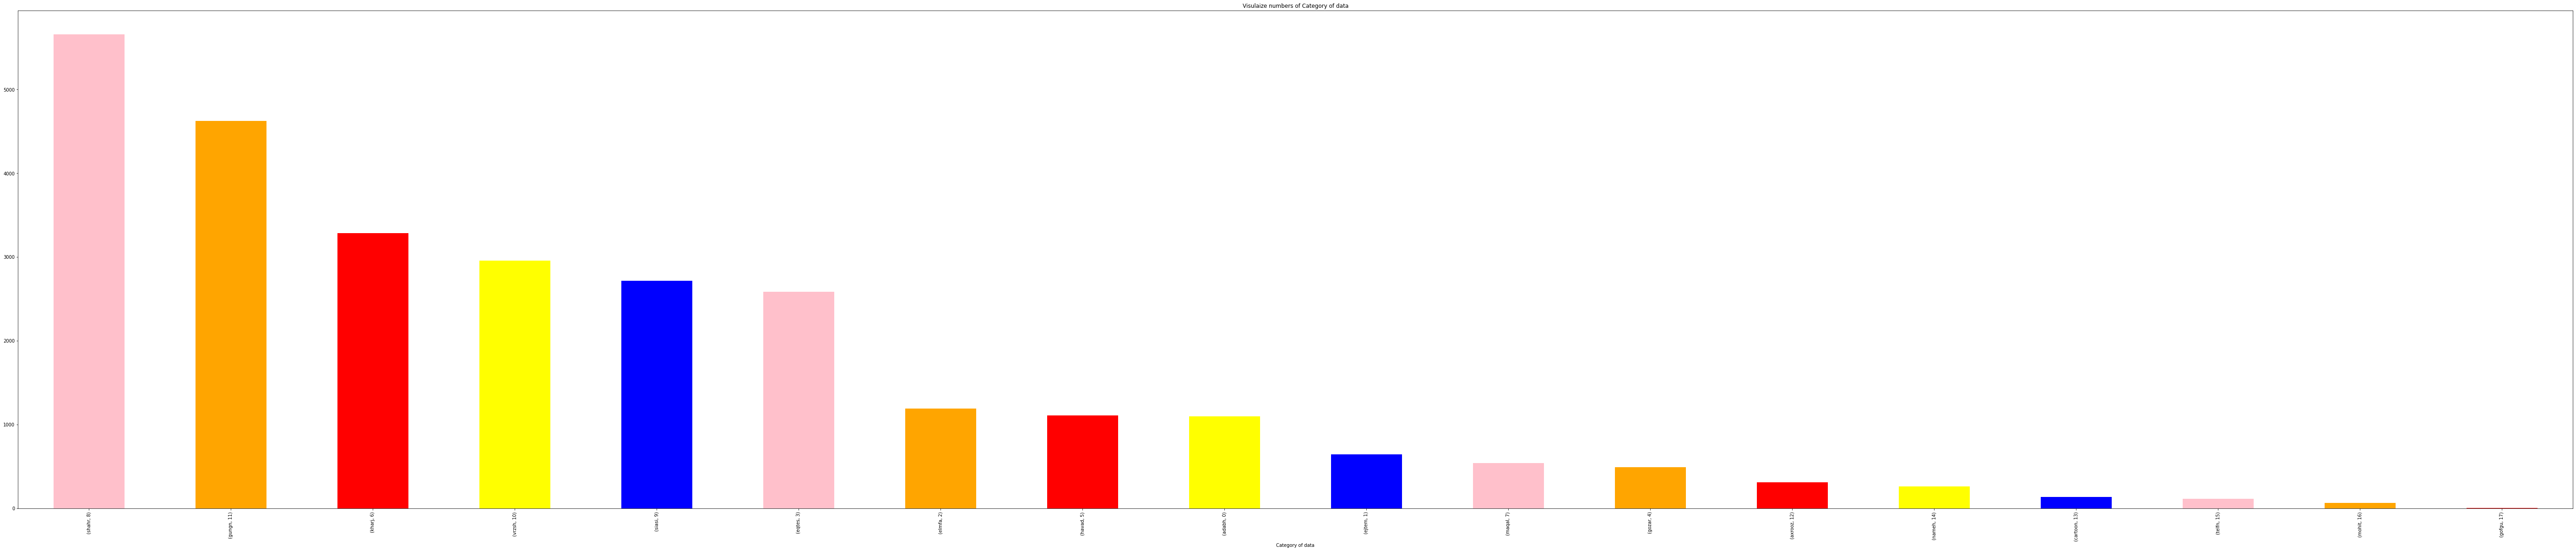

In [14]:
print(dataset.groupby('cat').catId.value_counts())
dataset.groupby('cat').catId.value_counts().sort_values(ascending=False).plot(figsize=(100,20), kind = "bar", color = ["pink", "orange", "red", "yellow", "blue"])
plt.xlabel("Category of data")
plt.title("Visulaize numbers of Category of data")
plt.show()

##remove all stopwords and special characters

In [15]:
stopwordsFile = open("/content/drive/MyDrive/Colab Notebooks/NLP/news-classification/content/PersianStopWords.txt", "r")
stopwords = stopwordsFile.read()

content_list = stopwords.split("\n")
stopwordsFile.close()

def special_char(text):
  reviews = ''
  for x in text:
    if x.isalnum():
      reviews = reviews + x
    else:
      reviews = reviews + ' '
  return reviews

dataset['text'] = dataset['text'].apply(special_char)
dataset['text'][1]

# def remove_stopwords(text):
#   stop_words = set(stopwords)
#   words = word_tokenize(text)
#   return [x for x in words if x not in stop_words]

# dataset['text'] = dataset['text'].apply(remove_stopwords)
# dataset['text'][1]

'رويدادهاي هنري جهان نمايشگاه هنر در خدمت ديكتاتورها نمايشگاه ارتباط بين هنر وقدرت ديكتاتورها در اروپا درشهر برلين آغاز به كار كرد  به گزارش واحد مركزي خبر به نقل از شبكه خبري اروپا در اين نمايشگاه كه در موزه تاريخ آلمان برپا شده است ترتيبدهندگان با به نمايش گذاشتن آثار نقاشي و مجسمه سازي قصد دارند نشان دهند كه چگونه از آثار هنري در بين سالهاي 1930 و 1945 به عنوان وسائل تبليغاتي استفاده مي شد  در اين نمايشگاه سوءاستفاده هاي هنري هيتلر در زمان آلمان نازي  موسيليني در ايتاليا  سردمداران اتحاد جماهير شوروي  اسپانيا و همه ديكتاتورهاي بزرگ اوائل قرن حاضر در اروپا به نمايش گذاشته شده است  در اين نمايشگاه 500 اثر هنري به معرض نمايش گذاشته شده اند  نمايشگاه آثار پيكاسو در اردن ملكه اسپانيا  سوفيا   به همراه ملكه اردن   نور   نمايشگاهي از آثار پيكاسو رادر گالري ملي اردن افتتاح كردند  اين نمايشگاه در پايتخت اين كشور  امان افتتاح شد و در آن آثار مختلف نقاش معروف اسپانيايي  پابلو پيكاسو به نمايش گذاشته شده اند  آثار مذكور جزء اموال موزه هنرهاي معاصر اسپانيا هستند و به مدت يك ماه در امان به نمايش گ

##lemmatizing or stemming the words

In [16]:
# def lemmatize_word(text):
#   wordnet = WordNetLemmatizer()
#   return " ".join([wordnet.lemmatize(word) for word in text])

# dataset['text'] = dataset['text'].apply(lemmatize_word)
# dataset['text'][1]

##after text_preprocessing print dataset

In [17]:
dataset

,id,date,cat,text,catId
0,1S1,75\04\02,adabh,جاودانگي در زندگي گروهي از طريق هنر نگاهي به ن...,0
1,2S1,75\04\02,adabh,رويدادهاي هنري جهان نمايشگاه هنر در خدمت ديكتا...,0
2,3S1,75\04\02,adabh,برديوار نگارخانه ها گالري گلستان نمايشگاه طرح...,0
3,4S1,75\04\02,ejtem,بازي را جدي بگيريم مطالعه اي مقدماتي پيرامون ن...,1
4,5S1,75\04\02,elmfa,تخته سياه و غباري كه سترده نمي شود اشاره ب...,2
...,...,...,...,...,...
27813,27814S1,76\06\20,gungn,گشتي در دنياي خبرها ماليات براي گدايي بوخارست ...,11
27814,27815S1,76\06\20,gungn,تا رفع اختلال از خطوط ارتباطي 125 شماره تلفن ه...,11
27815,27816S1,76\06\20,gungn,كلاسهاي جديد ديابتي ها انجمن ديابت ايران اعلام...,11
27816,27817S1,76\06\20,gungn,كلاسهاي مشاوره روانشناسي نشست هاي يكروزه روانش...,11


##declared dependent and independent value

In [18]:
x = dataset['text']
y = dataset['cat']

##create and fit bag of words model

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

x = np.array(dataset.iloc[:,0].values)
y = np.array(dataset.catId.values)

cv = CountVectorizer(max_features = 5000)
x = cv.fit_transform(dataset.text).toarray()

print("X.shape = ",x.shape)
print("y.shape = ",y.shape)

X.shape =  (27818, 5000)
y.shape =  (27818,)


In [20]:
print(x)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 1 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


##train test and split the dataset into training and test set

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0, shuffle = True)


print(len(x_train))
print(len(x_test))


19472
8346


In [22]:
print(x_train)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


#**Data Preprocessing**

##create empty list

In [23]:
#create list of model and accuracy dicts
perform_list = []

##create, fit and predict all Machine learning model

In [24]:
def run_model(model_name, est_c, est_pnlty):
    mdl = LogisticRegression()
   
    oneVsRest = OneVsRestClassifier(mdl)
    oneVsRest.fit(x, y)
    y_pred = oneVsRest.predict(x_test)
    
    
    # Performance metrics
    accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)
    # Get precision, recall, f1 scores
    precision, recall, f1score, support = score(y_test, y_pred, average='micro')

    print(f'Test Accuracy Score of Basic {model_name}: % {accuracy}')
    print(f'Precision : {precision}')
    print(f'Recall    : {recall}')
    print(f'F1-score   : {f1score}')

    # Add performance parameters to list
    perform_list.append(dict([
        ('Model', model_name),
        ('Test Accuracy', round(accuracy, 2)),
        ('Precision', round(precision, 2)),
        ('Recall', round(recall, 2)),
        ('F1', round(f1score, 2))
         ]))

##Logistic Regression

In [25]:
run_model('Logistic Regression', est_c=None, est_pnlty=None)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Test Accuracy Score of Basic Logistic Regression: % 97.63
Precision : 0.9762760603882099
Recall    : 0.9762760603882099
F1-score   : 0.9762760603882099


##create dataframe of model, accuracy, precision,recall and f1

In [26]:
model_performance = pd.DataFrame(data=perform_list)
model_performance = model_performance[['Model', 'Test Accuracy', 'Precision', 'Recall', 'F1']]
model_performance

,Model,Test Accuracy,Precision,Recall,F1
0,Logistic Regression,97.63,0.98,0.98,0.98


##best model to perform accuracy score

In [27]:
model = model_performance["Model"]
max_value = model_performance["Test Accuracy"].max()
print("The best accuracy of model is", max_value,"from Logistic Regression")

The best accuracy of model is 97.63 from Logistic Regression


#Individual train, fit and predict the model

In [28]:
model = LogisticRegression()
model.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [29]:
y_pred = model.predict(x_test)
score = accuracy_score(y_test, y_pred)
# print(pd.DataFrame({'text_test':x_test,'cat_test':y_test}))
print("accuracy of our model is:",score)
print(classification_report(y_pred, y_test, target_names=target_category))

accuracy of our model is: 0.8124850227653966
              precision    recall  f1-score   support

       adabh       0.75      0.79      0.77       301
       ejtem       0.69      0.70      0.70       198
       elmfa       0.62      0.63      0.62       354
       eqtes       0.87      0.85      0.86       755
       gozar       0.72      0.77      0.75       137
       havad       0.60      0.60      0.60       337
       kharj       0.93      0.91      0.92      1017
       maqal       0.57      0.68      0.62       133
       shahr       0.78      0.78      0.78      1766
       siasi       0.76      0.83      0.80       740
       vrzsh       0.96      0.97      0.97       875
       gungn       0.88      0.80      0.84      1476
      axrooz       1.00      0.92      0.96       126
     cartoon       1.00      1.00      1.00        37
       nameh       0.29      0.49      0.36        49
       telfn       0.40      0.60      0.48        20
       mohit       0.21      0.20   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [40]:
test_texts = []
print("Real Categories: ")
for i in range(10):
  print(dataset['cat'][i])
  test_texts.append(dataset['text'][i])
y_pred1 = cv.transform(
    test_texts
  )
print("Predict Categories: ")
yy = model.predict(y_pred1)
for i in range(10):
  print(category.loc[category['catId'] == yy[i]].iat[0, 0])

Real Categories: 
adabh
adabh
adabh
ejtem
elmfa
elmfa
elmfa
elmfa
elmfa
elmfa
Predict Categories: 
adabh
adabh
adabh
ejtem
elmfa
shahr
elmfa
elmfa
gungn
elmfa
